# Peer Graded Asssignment

Breakfast Cereal Data

This data set contains nutritional information for 77 different breakfast cereals. There are 16 columns (15 features and 1 label) which are as follows:
- Name of cereal
- Manufacturer of cereal: A, G, K, N, P, Q, R
- Type: cold or hot
- Calories per serving
- Grams of protein
- Grams of fat
- Millirams of sodium
- Grams of fiber
- Grams of complex carbohydrates
- Grams of sugars
- Milligrams of potassium
- Percentage of vitamins
- Display shelf number
- Weight in ounces of one serving
- Number of cups in one serving
- Rating of the cereals

In [30]:
import pandas as pd
df = pd.read_excel('breakfast cereals/Cereals.xls', sheet_name='Data from DASL')
df.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


# Plan for data exploration
1. Identify columns that aren't needed
2. Account for missing values
3. Convert categorical data into numerical
4. Find insights by making plots

## 1) Columns that aren't needed
Certain features don't seem to provide any relevant or useful information that might help in an analysis. These features only give extra descriptive information about the product. These are:
- Name of the cereal
- Weight in ounces of one serving
- Number of cups in one serving

This data would not affect the rating of the serial and is only extra information. So these columns are removed.

In [31]:
df.drop(columns = ['name','weight','cups'], inplace = True)
df.head(5)

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
0,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,68.402973
1,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,33.983679
2,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,59.425505
3,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,93.704912
4,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,34.384843


## 2) Missing Values

In [32]:
df.count()

mfr         77
type        77
calories    77
protein     77
fat         77
sodium      77
fiber       77
carbo       76
sugars      76
potass      75
vitamins    77
shelf       77
rating      77
dtype: int64

In [33]:
df[df.isnull().any(axis=1)]
# viewing rows with null values

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
4,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,34.384843
20,N,H,100,3,0,80,1.0,21.0,0.0,NaN,0,2,64.533816
57,Q,H,100,5,2,0,2.7,NaN,NaN,110.0,0,1,50.828392


Different methods can be used to deal with missing values, some of which are:
1. Replace with 0 or another fixed value, eg previous/next value
2. Replace with mean of column or previous and next values or mean of values of same category (same manufacturer)
3. Row can be removed from data
4. Interpolating

For simplicity, missing values are dropped

In [34]:
df.dropna(inplace = True)

## 3) Categorical Data

Categorical data exists in columns 'mfr' and 'type'. 
'mfr' can take 7 values and 'type' can take 2 values. 
'mfr' is encoded as a value from 1-7.
- A=1, G=2, K=3, N=4, P=5, Q=6, R=7
'type' is encoded as a binary variable.
- C=1, H=0

In [35]:
dict_mfr = {"A":1, "G":2, "K":3, "N":4, "P":5, "Q":6, "R":7}
dict_type = {"C":1, "H":0}
df['mfr'].replace(dict_mfr, inplace =True)
df.head(5)

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
0,4,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,68.402973
1,6,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,33.983679
2,3,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,59.425505
3,3,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,93.704912
5,2,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,29.509541


In [36]:
df['type'].replace(dict_type, inplace =True)
df.head(5)

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
0,4,1,70,4,1,130,10.0,5.0,6.0,280.0,25,3,68.402973
1,6,1,120,3,5,15,2.0,8.0,8.0,135.0,0,3,33.983679
2,3,1,70,4,1,260,9.0,7.0,5.0,320.0,25,3,59.425505
3,3,1,50,4,0,140,14.0,8.0,0.0,330.0,25,3,93.704912
5,2,1,110,2,2,180,1.5,10.5,10.0,70.0,25,1,29.509541


## 4) Finding Insights

### Correlation plot

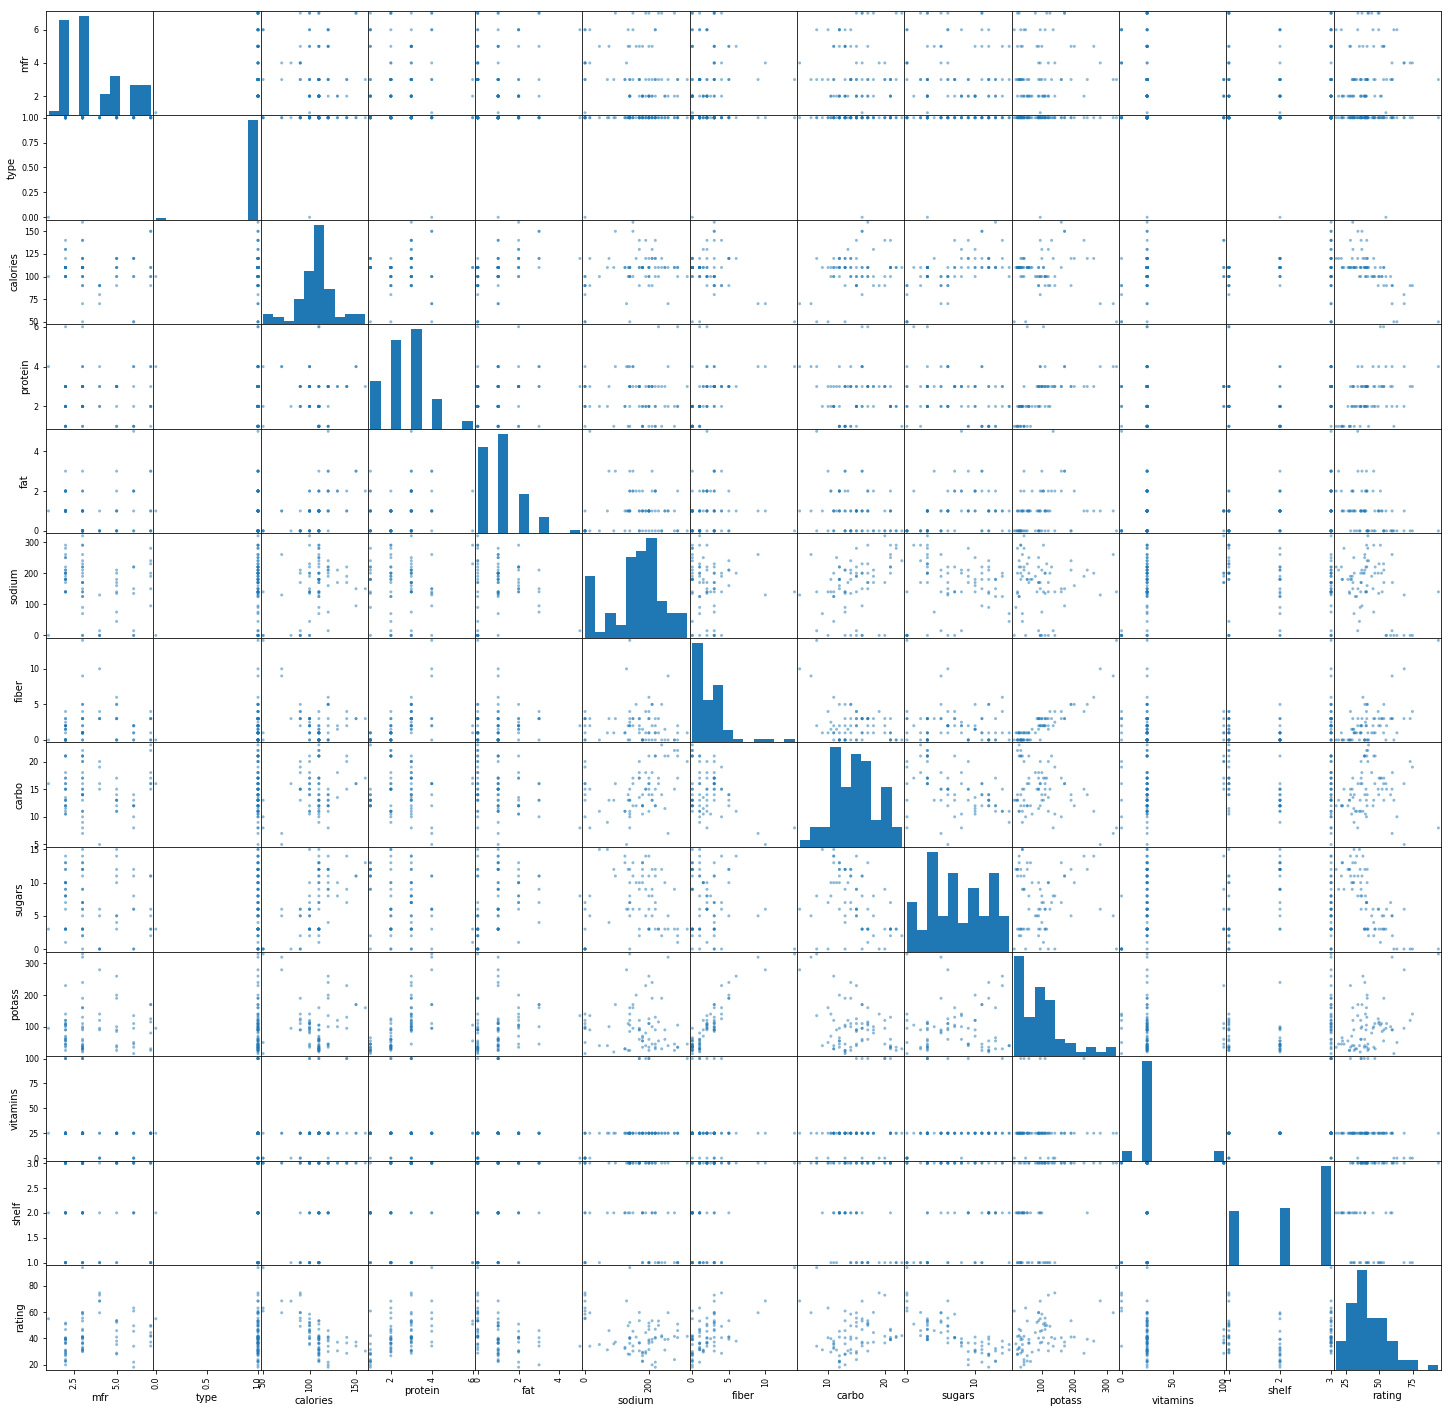

In [47]:
import matplotlib.pyplot as plt
% matplotlib inline
pd.plotting.scatter_matrix(df,figsize=(25,25));

In [50]:
df.corr()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
mfr,1.000000,0.183644,-0.076075,-0.012352,0.040027,-0.162478,0.068406,0.002015,-0.111290,0.033700,-0.260153,0.006021,0.149947
type,0.183644,1.000000,0.041729,-0.162825,0.000000,0.231160,0.105795,-0.038464,0.111055,0.005841,0.021428,0.030621,-0.104786
calories,-0.076075,0.041729,1.000000,0.033992,0.507373,0.296247,-0.295212,0.270606,0.569121,-0.071361,0.259846,0.089243,-0.693785
protein,-0.012352,-0.162825,0.033992,1.000000,0.202353,0.011559,0.514006,-0.036743,-0.286584,0.578743,0.054800,0.195635,0.467162
fat,0.040027,0.000000,0.507373,0.202353,1.000000,0.000822,0.014036,-0.284934,0.287152,0.199637,-0.030514,0.277980,-0.405050
sodium,-0.162478,0.231160,0.296247,0.011559,0.000822,1.000000,-0.070735,0.328409,0.037059,-0.039438,0.331576,-0.121897,-0.383012
fiber,0.068406,0.105795,-0.295212,0.514006,0.014036,-0.070735,1.000000,-0.379084,-0.150949,0.911504,-0.038717,0.313787,0.603411
carbo,0.002015,-0.038464,0.270606,-0.036743,-0.284934,0.328409,-0.379084,1.000000,-0.452069,-0.365003,0.253579,-0.188996,0.055941
sugars,-0.111290,0.111055,0.569121,-0.286584,0.287152,0.037059,-0.150949,-0.452069,1.000000,0.001414,0.072954,0.061449,-0.755955
potass,0.033700,0.005841,-0.071361,0.578743,0.199637,-0.039438,0.911504,-0.365003,0.001414,1.000000,-0.002636,0.394585,0.415782


Looking at the scatter plots and correlation matrix, it can be observed that,
- There isn't any significant correlation between most of the features. The highest being a negative correlation of -75.59% between suger content and rating.
- The type and manufacturer also has no significant correlation with any variable. The highest correlation for type is with sodium at 23%. For manufacturer it is with vitamins at -26%.
- The shelf variable has the highest correlation with potass at 39.45% but only a 5.1% correlation with rating.
- The carb content, type and manufacturer also have 5.59%, -10.47% and 14.99% correlation with rating respectively.

## Overall, there isn't much correlation between the variables. Some of these variable might not be of use when predicting or classifying using this dataset.

# Hypothesis Formulation

- $H_{o1}$: 'Type' feature is insignificant
- $H_{o2}$: 'Shelf' feature is insignificant
- $H_{o3}$: The correlation between 'sugars' and 'rating' is significant

# Significance test

Using the two-sided z-test (since sample size is large enough) to find the significance level for $H_{o3}$: The correlation between 'sugars' and 'rating' is significant

In [67]:
import scipy

corrcoef, pval =scipy.stats.pearsonr(df['sugars'],df['rating'])


print(float(pval*100))


6.924141457143443e-13


The p-value is extremely small suggesting that we reject our null hypothesis that there is significant correlation between the two groups. Thus the two feature are correlated, but that correlation is not of any significance.

# Next Steps

Next steps would include formulating and testing different hypothesises in order to understand the relation between features of the data better. Appropoate statistical tools can be used to perform these tests.

In conslusion, this data set was quite clean and there were no strange values. The description was clearly provided and there wasn't any ambiguity.